# Project: Investigating reasons for missing appointments in Brazil 

## Introduction

### Dataset Description

The data for the dataset named 'noshowappointment-kaggle2-may-2016.csv' consist of 14 labeled columns: PatientId, AppointmentID, Gender, ScheduledDay, AppointmentDay, age, Neighbourhood, Scholarship, Hipertension, Diabetes, Alcoholism, Handcap, SMS_received, No-show.

PatientId - provides a reference number for each individual patient.  
AppointmentID - provides a reference number for each appointment scheduled.  
ScheduledDay - provides a date and time each appointment was scheduled.  
AppointmentDay - provides a date for each hospital appointment scheduled.  
Age - provides the age for each patient.  
Neighbourhood - provides the neighbourhood where each hospital is located.  
Scholorship - indicates if the patient is on state funded medical assistance.  
Hipertension, Diabetes, and Alcoholism - are all medical conditions that patients could have.  
Handcap - indicates whether the patient is classified as Handicap.  
SMS_received - indicates whether the patient received a SMS message regarding their appointment.  
No-show - indicates the if patient missed their appointment.  

Columns in this dataset provide appointment related materials relative to the patient and their attendance to each appointment.


### Question(s) for Analysis

### Do factors such as age, the use of SMS messaging, and gender have any effect on the attendance of the patient to the appointment?

Importing modules

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Data Wrangling

Obtaining the data set and displaying the first 5 rows

In [3]:
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


The dataset info() function provides us with each column name and its associated number of values, columns, and datatypes. 


This dataset has no missing or null values and consist of data types of float, int, and string.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


Getting a general idea of our data

In [5]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


### Data Cleaning

The dataset consist of 14 columns of data and 110527 rows.  The patientId column is labeled as a float, however the patientId numbers are not clear as to the number at face value.  The patientId column will be converted to an int data type for cleaner reading. ScheduledDay and AppointmentDay are both string entries which have the ability to indicate the time of the scheduling of the appointment and time of the appointment.  The AppointmentDay column however does not have any times other than 00:00:00.  The time portion of both columns will be removed as they are ineffective in the determination of any valuable analysis.

PatientId converstion using astype() function

In [6]:
df['PatientId'] = df['PatientId'].astype(int)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null int64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: int64(9), object(5)
memory usage: 11.8+ MB


The above is conversion of PatientId column from float to int.  df.info() displays the converstion results, where PatientId now displays it is an int datatype. 

Converstion of ScheduledDay and AppointmentDay to date/time 

In [8]:
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay']).dt.date
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay']).dt.date
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,29872499824296,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Both ScheduledDay and AppointmentDay have been modified to datetime, eliminating excess numbers simplifing the readability and making analysis easier for later manipulation.

Column names for AppointmentID, Handcap, and Hipertension will be adjusted to correct spelling errors and or format errors.

In [9]:
df.rename(columns = {'AppointmentID':'AppointmentId', 'Handcap': 'Handicap', 'Hipertension': 'Hypertension'}, inplace=True)

In [10]:
df.head(1)

,PatientId,AppointmentId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
0,29872499824296,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No


The three column names are successfully changed and reflected in table

Creating a new column for classification of age groups for later analysis and display of the new "Age_group" column.

In [11]:
labels_age_group = pd.Series(['Child', 'Teens', 'Twenties', 'Thirties', 'Fourties', 'Fifties', 'Sixties', 'Seventies', 'Eighties', '90 & Above'])

# cutting data into bins
df['Age_group'] = pd.cut(df['Age'], bins=[0,9,19,29,39,49,59,69,79,89,115], labels=labels_age_group)

# examples of data
df.head()

,PatientId,AppointmentId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,Age_group
0,29872499824296,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Sixties
1,558997776694438,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Fifties
2,4262962299951,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,Sixties
3,867951213174,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,Child
4,8841186448183,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,Fifties


https://www.geeksforgeeks.org/adding-new-column-to-existing-dataframe-in-pandas/?ref=gcse

Change 'No', 'Yes' to 0, 1

In [12]:
df.replace(to_replace=['No', 'Yes'],value=[0, 1],inplace=True)

In [13]:
df.head()

,PatientId,AppointmentId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,Age_group
0,29872499824296,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0,Sixties
1,558997776694438,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0,Fifties
2,4262962299951,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0,Sixties
3,867951213174,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,Child
4,8841186448183,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0,Fifties


### Exploratory Data Analysis

#### Research Question 1
#### Does age play a significant factor in whether a patient shows up to an appointment?

view the statistics on the column age.

In [14]:
df.Age.describe()

count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

The column age has a min value of -1, this value needs to be removed from the dataset.

In [15]:
df = df[df.Age >= 0]
df.Age.describe()

count    110526.000000
mean         37.089219
std          23.110026
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

Minimum age is now set to zero

Distribution of ages

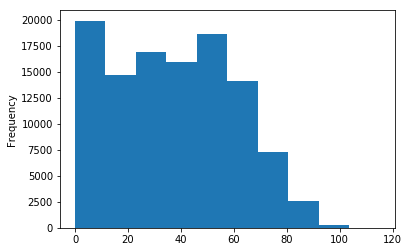

In [16]:
df['Age'].plot(kind='hist');

Total age group counts

In [17]:
totalagecount = df.groupby(['Age_group']).Gender.count()
totalagecount

Age_group
Child         13936
Teens         12936
Twenties      13699
Thirties      15171
Fourties      14209
Fifties       15863
Sixties       11876
Seventies      5934
Eighties       2946
90 & Above      417
Name: Gender, dtype: int64

Counts by age group for show, noshow to appointments.

In [18]:
agegroup_count = df.groupby(['Age_group', 'No-show'])['Gender'].count()
agegroup_count

Age_group   No-show
Child       0          11091
            1           2845
Teens       0           9679
            1           3257
Twenties    0          10319
            1           3380
Thirties    0          11871
            1           3300
Fourties    0          11329
            1           2880
Fifties     0          13087
            1           2776
Sixties     0          10086
            1           1790
Seventies   0           5032
            1            902
Eighties    0           2481
            1            465
90 & Above  0            332
            1             85
Name: Gender, dtype: int64

Determining the percentage of missed appointments by age group rounded for cleaner reading.

In [19]:
percentage_missed = round((agegroup_count[1]/totalagecount)*100)
percentage_missed

Age_group
Child          20.0
Teens          22.0
Twenties       21.0
Thirties       19.0
Fourties       20.0
Fifties        18.0
Sixties        24.0
Seventies      48.0
Eighties       97.0
90 & Above    682.0
Name: Gender, dtype: float64

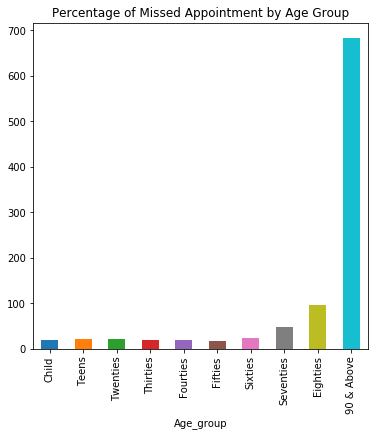

In [20]:
percentage_missed.plot(kind='bar', figsize=(6,6), title='Percentage of Missed Appointment by Age Group')

Based on Age_group the percentage of missed appointments hovers around 20% until the age group is in the 70.  The Age_group fifties, has lowest percentage_missed and the highest attendance numbers as indicated by the agegroup_count display.

The following is a description of the 'No-show' column

In [21]:
df['No-show'].describe()

count    110526.000000
mean          0.201934
std           0.401445
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: No-show, dtype: float64

In [62]:
def colcount(x):
    result = df[x].value_counts()
    return result

The counts of the No-show column reflects as follows:

In [65]:
counts = colcount('No-show')
counts

0    88207
1    22319
Name: No-show, dtype: int64

create mask for 0,1

In [23]:
present = df['No-show']==0
absent = df['No-show']==1

Pie chart visual representation of the 'No-show' column

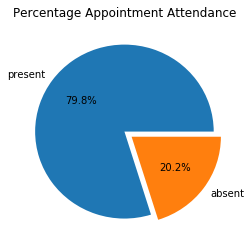

In [24]:
labels='present', 'absent'
counts.plot(kind='pie', figsize=(4,4), title='Percentage Appointment Attendance', labels=labels, label='', explode=(0,0.1), autopct='%1.1f%%')

https://www.askpython.com/python/plot-customize-pie-chart-in-python#:~:text=To%20plot%20a%20basic%20Pie-chart%20we%20need%20the,we%20get%20the%20following%20output%20%3A%20Pie%20Chart

In [25]:
p =(df['No-show']==0).sum()
p

88207

In [26]:
a =(df['No-show']==1).sum()
a

22319

Distribtion of no-show values related to ages.  It appears that after the age 30 the number of missed appointments begin to decline.


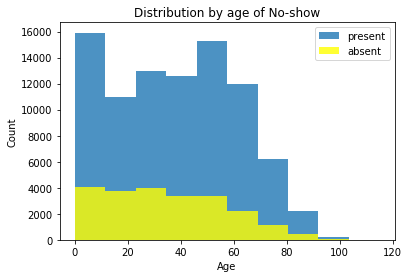

In [27]:
plt.hist(df.Age[present], label='present', alpha=.8)
plt.hist(df.Age[absent], label='absent', alpha=.8,color='yellow')
plt.title('Distribution by age of No-show')
plt.ylabel('Count', size=10)
plt.xlabel('Age', size=10)
plt.legend()

ref: https://www.geeksforgeeks.org/how-to-plot-two-histograms-together-in-matplotlib/?ref=lbp

#### Research Question 2
#### Does the use of SMS messages increase a patient's attendance to an appointment?

Number of SMS messages

In [69]:
colcount('SMS_received')

0    75044
1    35482
Name: SMS_received, dtype: int64

Number of Messages received versus not received

In [28]:
received = (df['SMS_received']==1).sum()
received

35482

In [29]:
notreceived = (df['SMS_received'] == 0).sum()
notreceived

75044

Message counts appears as though the use of SMS messaging when received had no significant effect on attendance. 

In [30]:
message_counts = df.groupby(['SMS_received', 'No-show'])['AppointmentId'].count()
message_counts[1]

No-show
0    25698
1     9784
Name: AppointmentId, dtype: int64

Total count for use in percentage_received

In [31]:
mct = df.SMS_received.count()
mct

110526

Roughly 32% of all messages sent were recevied

In [32]:
percentage_received = (received/mct)*100
percentage_received

32.102853627200837

There is no strong correlation between attendance and SMS_messaging

In [33]:
df.corr()

,PatientId,AppointmentId,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
PatientId,1.000000,0.004023,-0.004121,-0.002877,-0.006436,0.001608,0.011014,-0.007915,-0.009742,-0.001456
AppointmentId,0.004023,1.000000,-0.019106,0.022619,0.012759,0.022632,0.032946,0.014107,-0.256613,-0.162597
Age,-0.004121,-0.019106,1.000000,-0.092463,0.504586,0.292391,0.095810,0.078032,0.012633,-0.060327
Scholarship,-0.002877,0.022619,-0.092463,1.000000,-0.019730,-0.024894,0.035022,-0.008587,0.001192,0.029134
Hypertension,-0.006436,0.012759,0.504586,-0.019730,1.000000,0.433085,0.087970,0.080083,-0.006270,-0.035704
Diabetes,0.001608,0.022632,0.292391,-0.024894,0.433085,1.000000,0.018473,0.057530,-0.014552,-0.015181
Alcoholism,0.011014,0.032946,0.095810,0.035022,0.087970,0.018473,1.000000,0.004647,-0.026149,-0.000197
Handicap,-0.007915,0.014107,0.078032,-0.008587,0.080083,0.057530,0.004647,1.000000,-0.024162,-0.006077
SMS_received,-0.009742,-0.256613,0.012633,0.001192,-0.006270,-0.014552,-0.026149,-0.024162,1.000000,0.126428
No-show,-0.001456,-0.162597,-0.060327,0.029134,-0.035704,-0.015181,-0.000197,-0.006077,0.126428,1.000000


Masking values

In [34]:
received = df['SMS_received']==1
notreceived = df['SMS_received']==0

Creating a break down of combination of SMS_received and No-show columns to see values of messages and their related effect of No-shows.
It appears that SMS messaging had no effect on the show status of patients.

In [35]:
received_df = df.groupby(['SMS_received', 'No-show'])['AppointmentId'].count()
received_df

SMS_received  No-show
0             0          62509
              1          12535
1             0          25698
              1           9784
Name: AppointmentId, dtype: int64

Bar graph visual of received_df values

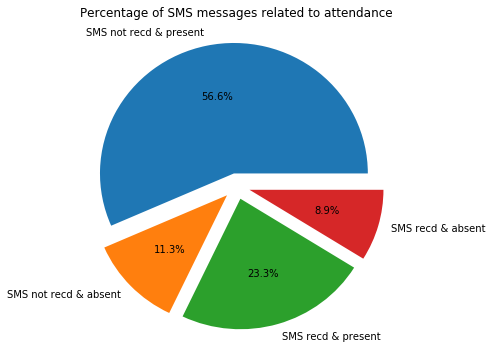

In [71]:
labels = 'SMS not recd & present', 'SMS not recd & absent', 'SMS recd & present', 'SMS recd & absent'
received_df.plot(kind='pie', figsize=(6,6), title='Percentage of SMS messages related to attendance', explode=(0.1, 0.1, 0.1, 0.1), labels=labels, label='', autopct='%1.1f%%')

It apperas that SMS_messaging had no substantial effect on the overall attendance.

#### Research Question 3
#### Does gender influence the attendence of a patient?

Getting infomation on Gender column

In [37]:
df['Gender'].describe()

count     110526
unique         2
top            F
freq       71839
Name: Gender, dtype: object

What are the two unique values in the Gender column?

In [38]:
df['Gender'].unique()

array(['F', 'M'], dtype=object)

Females make up the greatest number of patients

In [72]:
def barplot_count(col, graphtitle):
    df[col].value_counts().plot(kind='bar', figsize=(6,6), title=graphtitle)

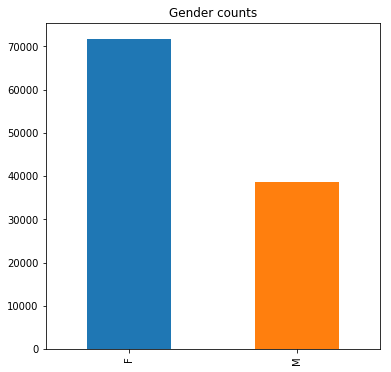

In [73]:
barplot_count('Gender', 'Gender counts')

Obtain counts for Gender M/F and No_show combined.

In [40]:
gender_df = df.groupby(['Gender', 'No-show'])['AppointmentId'].count()
gender_df

Gender  No-show
F       0          57245
        1          14594
M       0          30962
        1           7725
Name: AppointmentId, dtype: int64

Bar Graph providing a visual representation of gender attendence to appointments.

Text(0.5,0,'Gender No_show')

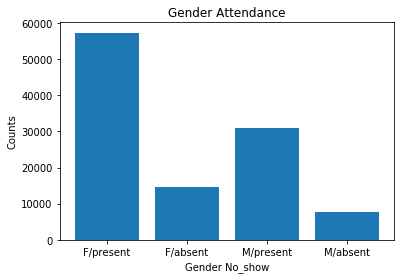

In [51]:
plt.bar([1,2,3,4], [57245, 14594, 30962, 7725], tick_label=['F/present', 'F/absent', 'M/present', 'M/absent'])
plt.title('Gender Attendance')
plt.ylabel('Counts')
plt.xlabel('Gender No_show')

Female patients attend more appointments than Males, thus a female is more likely to show up for an appointment as opposed to a Male.

https://www.geeksforgeeks.org/bar-plot-in-matplotlib/?ref=lbp

### Conclusions

Age does play a factor in determining the likelihood if a patient will show up for an appointment.  Children, Thirties, and Fifties make the most apppointments overall and have the lowest percentage of missed appointments.  Overall individuals in their Fifties are less likely to miss an appointment based on the histogram distributionand percentage missed.
SMS messaging does not play significant roll in determining if a patient will show for an appointment.  THis is based on data provided in this set.  The data indicates that only 32% of all patients actually received a SMS message reminder.
The role of Gender in determining the likely hood of attendance, appears to be good for female patients. More female patients attend appointments more than males. 

#### Limitations

The conclusions for this data set a limited to the data that was provided.  Further analysis can be conducted to discover other trends.  Other limitations to the nature of this analysis, related to patients attendence could consist of medical status at time of appointment, ability to travel to and from, distance and weather conditions.  All are factors could possibly limit the attendance however are not referenced in the data.

References:
https://www.geeksforgeeks.org/how-to-plot-two-histograms-together-in-matplotlib/?ref=lbp
https://www.geeksforgeeks.org/adding-new-column-to-existing-dataframe-in-pandas/?ref=gcse
https://www.geeksforgeeks.org/bar-plot-in-matplotlib/?ref=lbp
https://www.askpython.com/python/plot-customize-pie-chart-in-python#:~:text=To%20plot%20a%20basic%20Pie-chart%20we%20need%20the,we%20get%20the%20following%20output%20%3A%20Pie%20Chart